<h3 style="color:blue;">  Etude du modèle exponentielle type III  :  (18) page 14 </h3>
    
<h3>$$X_t= \displaystyle \alpha_{1} +\alpha_{2}\, e^{\alpha_{3} t}+\varepsilon_{t} \,\,\,\, \varepsilon_{t} \sim \mathcal{N}(0,\sigma^2)$$
</h3> 

In [1]:
%reset -f

%matplotlib inline


import matplotlib.pyplot as plt

import scipy.optimize # pour optimisation
import numpy
import random

from scipy.special import expit  # pour exp

def ajustement_exp_III(data):
    ### data = alpha_1+alpha_2*exp({alpha_3}*t) +E
    NN=len(data)
    t=numpy.arange(1,NN+1,1) ## t=[1,2,...,NN]
    
    def Objective(x, b1,b2,b3):
        return b1+b2*numpy.exp(b3*x)

    # on utilise la fonction curve_fit de scipy
    
    # bounds=((numpy.min(data),None),(1.0e-08,None),(None,None)), 
    params, params_covariance = scipy.optimize.curve_fit(Objective,t, data,gtol=1.1e-09,  
                                p0=numpy.random.rand(3),maxfev=10000)
    
    R=params
    fig, ax = plt.subplots(figsize=(11, 7))

    ax.spines['top'].set_visible(False)  # cacher le cadre du haut
    ax.spines['right'].set_visible(False)  # cacher le cadre de droit

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    
    plt.plot(t,R[0]+R[1]*numpy.exp(R[2]*t), 'r', label="données ajustementées")
    plt.plot(t, data,'o', label='données brutes', markersize=8)
    plt.legend()
    # affichage
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    plt.title("$\\hat{\\alpha}_{1}$=%.4f , $\\hat{\\alpha}_{2}$=%.4f , $\\hat{\\alpha}_{3}$=%.4f"%(R[0],R[1],R[2]))
    plt.xlabel("$t$", fontdict=font)
    plt.ylabel("$X_{t}=\\alpha_{1}+\\alpha_{2} e^{\\alpha_{3} t}$", fontdict=font)
    plt.show()
    
    # Dictionnaire pour le choix de modèle
    # variance des résidus
    Distance=[x-Objective(u, R[0],R[1],R[2]) for x,u in zip(data,t)]
    #print([Objective(u, R[0],R[1],R[2]) for u in t])
    #plt.plot(t,Distance)
    plt.show()
    
    #S2=numpy.dot(Distance,Distance)
    S2=sum([x**2 for x in Distance])
    V_R=S2/(1.0*NN)
    MSE=S2/(NN-len(R)-1.0)
    AIC=numpy.log(V_R)+(2.0*len(R))/(1.0*NN)
    BIC=numpy.log(V_R)+(numpy.log(NN)*len(R))/(1.0*NN)
    
    ## creation de dictionnaire pour les résultats
    dict_R = {}
    dict_R["parametres"] = [numpy.around(u , decimals=4)  for u in R]  # affichage avec 4 chiffres après la virgule
    dict_R["variance_residu"] =  numpy.around(V_R, decimals=4)
    dict_R["MSE"] = numpy.around(MSE , decimals=4)
    dict_R["AIC"] =  numpy.around(AIC, decimals=4)
    dict_R["BIC"] =  numpy.around(BIC, decimals=4)
    return dict_R


### Application  aux données gdp

In [2]:
import pandas
data_gdp=  pandas.read_csv('gdp.dat', sep='\s+'  , engine='python',index_col="YEAR")
data_gdp.head(5)

,AUSTRIA,CANADA,FRANCE,GERMANY,GREECE,ITALY,SWEDEN,UK,USA
YEAR,,,,,,,,,
1950,0.027523,3.651109,10.652861,5.725433,18.423605,0.799001,17.072701,1.033571,4.470303
1951,0.029406,3.734242,11.186672,6.256754,19.866240,0.829484,17.445339,1.060015,4.734335
1952,0.029357,3.932222,11.480235,6.703080,19.750938,0.859817,17.011088,1.104598,4.826502
1953,0.030603,4.019939,11.688318,7.256435,22.217731,0.916962,18.063728,1.152221,4.981746
1954,0.033678,3.860731,12.092329,7.726440,22.690231,0.942153,19.031748,1.191948,4.790810


pays : AUSTRIA


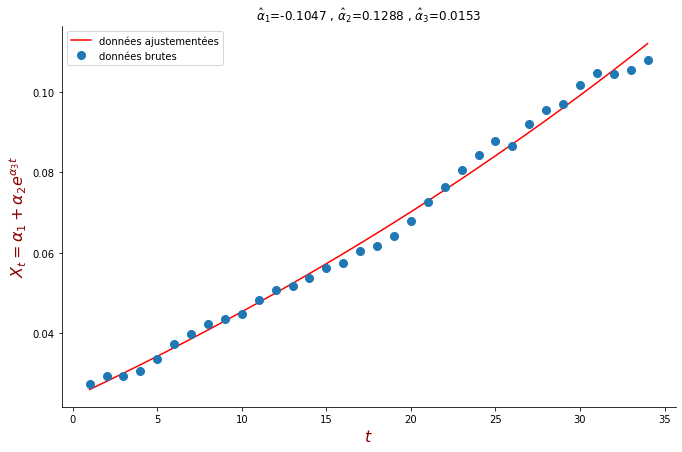

{'parametres': [-0.1047, 0.1288, 0.0153], 'variance_residu': 0.0, 'MSE': 0.0, 'AIC': -12.286, 'BIC': -12.1513}
########################################################################################################################
pays : CANADA


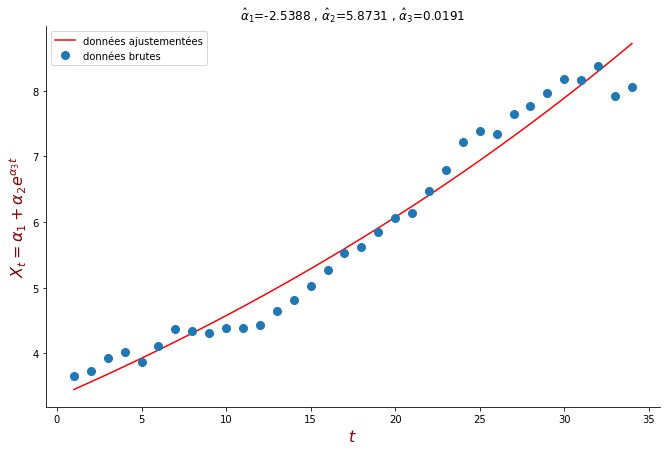

{'parametres': [-2.5388, 5.8731, 0.0191], 'variance_residu': 0.0748, 'MSE': 0.0848, 'AIC': -2.4165, 'BIC': -2.2818}
########################################################################################################################
pays : FRANCE


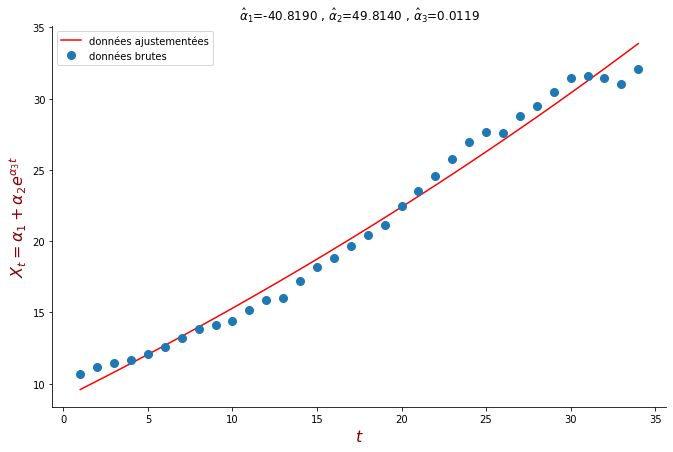

{'parametres': [-40.819, 49.814, 0.0119], 'variance_residu': 0.752, 'MSE': 0.8522, 'AIC': -0.1086, 'BIC': 0.0261}
########################################################################################################################
pays : GERMANY


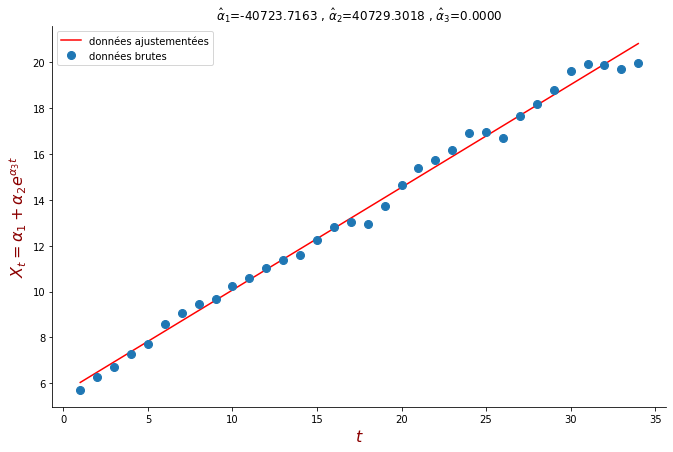

{'parametres': [-40723.7163, 40729.3018, 0.0], 'variance_residu': 0.1176, 'MSE': 0.1333, 'AIC': -1.9636, 'BIC': -1.8289}
########################################################################################################################
pays : GREECE


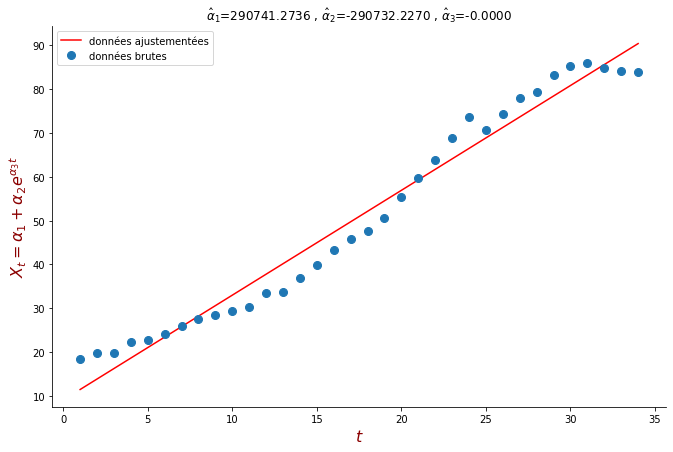

{'parametres': [290741.2736, -290732.227, -0.0], 'variance_residu': 16.9038, 'MSE': 19.1576, 'AIC': 3.004, 'BIC': 3.1387}
########################################################################################################################
pays : ITALY


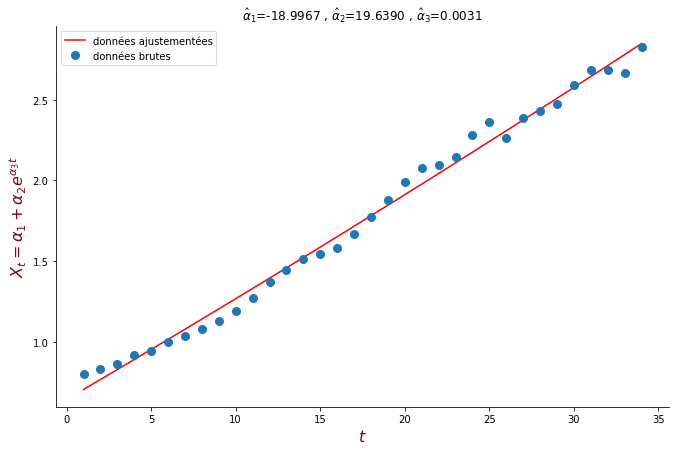

{'parametres': [-18.9967, 19.639, 0.0031], 'variance_residu': 0.0033, 'MSE': 0.0037, 'AIC': -5.5406, 'BIC': -5.406}
########################################################################################################################
pays : SWEDEN


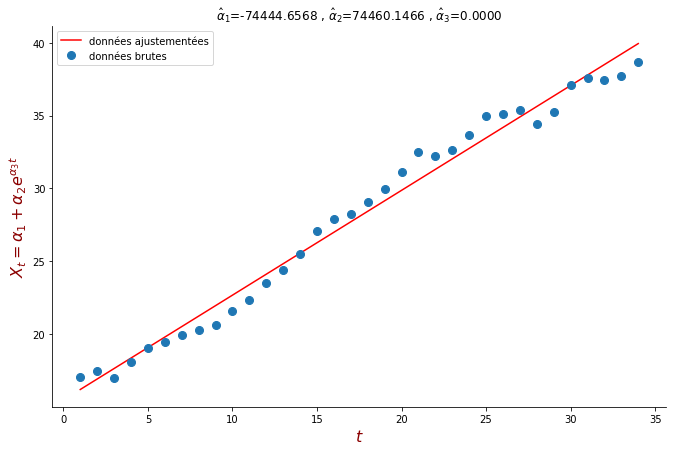

{'parametres': [-74444.6568, 74460.1466, 0.0], 'variance_residu': 0.8476, 'MSE': 0.9606, 'AIC': 0.0111, 'BIC': 0.1458}
########################################################################################################################
pays : UK


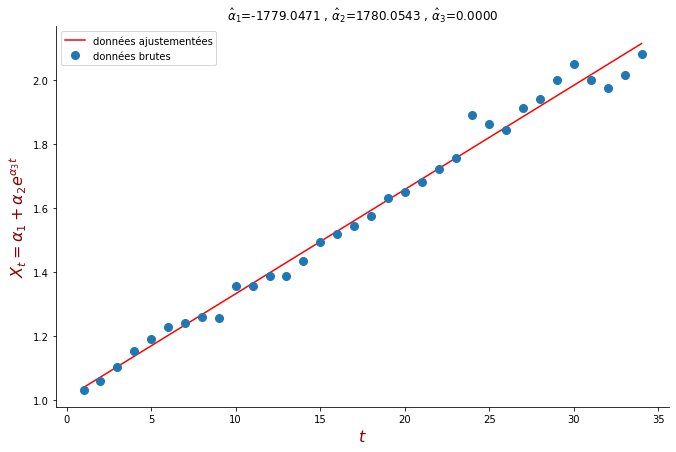

{'parametres': [-1779.0471, 1780.0543, 0.0], 'variance_residu': 0.0011, 'MSE': 0.0013, 'AIC': -6.5941, 'BIC': -6.4594}
########################################################################################################################
pays : USA


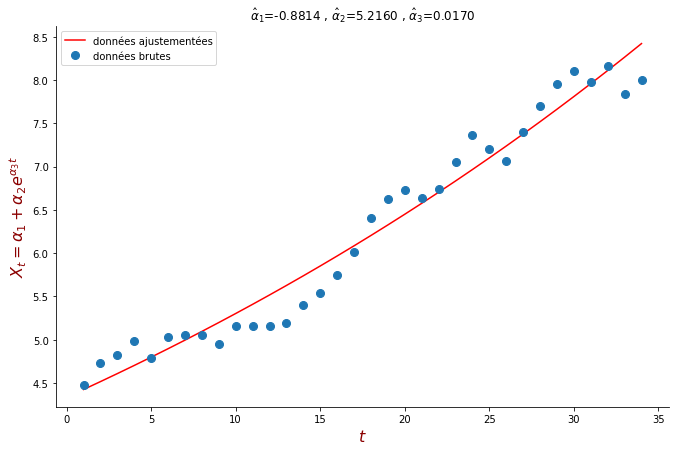

{'parametres': [-0.8814, 5.216, 0.017], 'variance_residu': 0.0573, 'MSE': 0.0649, 'AIC': -2.6838, 'BIC': -2.5491}
########################################################################################################################


In [3]:
for c in data_gdp.columns:
    print("pays :",c)
    T=ajustement_exp_III(data_gdp[c].values.tolist())
    print(T)
    print("####"*30)